<a href="https://colab.research.google.com/github/tselane2110/ML-Specialization/blob/main/MultipleLinearRegressionImplementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Note: This notebook consists of the implementation of MLR with and without regularization

For the **stopping criteria** of the recursive gradient descent algorithm, we are checking if the difference between the cost functions for the last 20 iterations is greater than the given threshold (1e-3 or 0.001).
If it is greater than the threshold, that means that our model hasnt converged yet, i.e., it is still improving. If not, then it has converged!

- Also, you can check the total number of iterations our model took to converge above the "learning curve" plot :))

# 1. Multiple Linear Regression (MLR) without regularization

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class MLR():
  def fit_data(self, x, y):
    '''
    x -> list of training examples (2d array)
    y -> list of actual outputs (1d array)
    m -> number of training examples (int)
    n -> number of features (int)
    w -> list of weights/coefficients of size n  (1d array)
    b -> bias/intercept (int)
    y_hat -> predicted output (1d array)
    cost -> dictionary :
            cost_w -> Contains lists of cost values for each weight w[i] across all iterations.
            cost_b -> Contains cost values for the bias term b across all iterations.
    cost_function -> list containing cost functions for each iteration
    number_of_iterations = min no of times we want our gradient descent to execute/run
    '''
    self.x = x
    self.y = y
    self.m = len(x)
    self.n = x.shape[1]
    self.w = np.zeros(self.n)
    self.b = 0
    self.y_hat = None
    self.cost = {
        'cost_w' : [],
        'cost_b' : []
    }
    self.cost_function = []
    self.number_of_iterations = 40

    # calling recursive GD
    self.recursiveGD()

  def predict(self, x):
    '''
    x -> training/testing data (2d array)
    '''

    y_hat = []
    for i in range(len(x)):
      y_hat.append(np.dot(self.w, x[i]) + self.b)
    return y_hat

  def error_w(self, j):
    error = 0
    for i in range(len(self.y_hat)):
      error += (self.y_hat[i] - self.y[i])*self.x[i][j]
    return error

  def error_b(self):
    error = 0
    for i in range(len(self.y_hat)):
      error += (self.y_hat[i] - self.y[i])
    return error

  def cost_w(self):
    cost_w = []
    for i in range(self.n):
      error = self.error_w(i)
      cost_w.append((1/self.m) * error)
    return cost_w

  def cost_b(self):
    cost_b = (1/self.m) * self.error_b()
    return cost_b

  def cost_function_lc(self):
    result = 0
    error = 0
    for i in range(len(self.y_hat)):
      error = error + ((self.y_hat[i] - self.y[i])**2)
    result = (1/(2*self.m)) * error
    return result

  def plot_learningCurve(self):
    # printing the total number of iterations

    print("total number of iterations: ", len(self.cost_function))
    plt.plot(range(len(self.cost_function)), self.cost_function, label='Learning Curve')  # Plot cost_function vs # of iterations
    plt.xlabel('Number of Iterations')
    plt.ylabel('Cost Function J(w, b)')
    plt.title('Learning Curve ')
    plt.legend()
    plt.show()

  def abs_diff(self, a, b):

    # abs_diff stands for absolute difference
    result = abs(a-b)
    return result

  def stopping_criteria_check(self, threshold):
    '''
    Need to check that the cost function for the last 20 iterations has converged
    Also verifying that we have calculated the cost atleast 40 times, idk for what reason but yea (I do know, i mean that's the min number
    of iterations Im aiming for)
    '''
    cost = self.cost_function

    if len(cost) >= self.number_of_iterations :
      for i in range(-21, -1, 1):
        if self.abs_diff(cost[i], cost[i+1]) > threshold:
          return 1
        else:
          return 0

    else:
      return 1

  def recursiveGD(self):
    # call the predict function to make predictions on updated weights
    self.y_hat = self.predict(self.x)

    # call the cost function to calculate the cost for the weights and the bias
    self.cost['cost_w'].append(self.cost_w())
    self.cost['cost_b'].append(self.cost_b())

    # calculating cost function to plot our learning curve afterwards
    self.cost_function.append(self.cost_function_lc())

    # call the gradient descent to get the best parameters (weights + bias)
    self.gradient_descent()

  def gradient_descent(self):
    alpha = 0.09
    threshold = 1e-3 # 0.001

    # stopping criteria
    sc = self.stopping_criteria_check(threshold)
    if sc == 0:
      self.plot_learningCurve()
      return

    # updating w
    for i in range(self.n):
      self.w[i] = self.w[i] - alpha * self.cost['cost_w'][-1][i]

    # updating b
    self.b = self.b - alpha * self.cost['cost_b'][-1]

    # calling recursive GD
    self.recursiveGD()



### - Testing MLR

In [2]:
model = MLR()

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Settings for reproducibility and dataset size
np.random.seed(42)
n_samples = 1000  # Number of data points
n_features = 5   # Number of features

# Step 1: Generate feature data with random values
X = np.random.rand(n_samples, n_features) * 100  # Random values from 0 to 1000

# Step 2: Define weights and bias for the linear relationship
weights = np.array([1.5, -2.0, 3.0, -4.5, 2.0])  # Example weights
bias = 5  # Example bias term

# Step 3: Create the target variable with a linear combination of features + noise
noise = np.random.randn(n_samples) * 0.5  # Small random noise
y = X.dot(weights) + bias + noise

# Step 4: Scale and normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Combine features and target into a DataFrame
columns = [f"Feature_{i+1}" for i in range(n_features)]
df = pd.DataFrame(X_scaled, columns=columns)
df["Target"] = y

# Display the first few rows of the dataset
print(df.head())


   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5      Target
0  -0.419860   1.517534   0.850019   0.351585  -1.190760 -147.854738
1  -1.173018  -1.488481   1.321065   0.360149   0.720043  146.552907
2  -1.639672   1.582177   1.202643  -0.995120  -1.101437    4.444779
3  -1.078557  -0.659519   0.122512  -0.229576  -0.722761   -6.583536
4   0.397974  -1.214324  -0.694070  -0.458198  -0.152204   83.142539


In [4]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and 'Target' is the name of your target column
X = df.drop('Target', axis=1)  # Features
y = df['Target']                # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the sizes of the resulting sets
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 800
Testing set size: 200


total number of iterations:  102


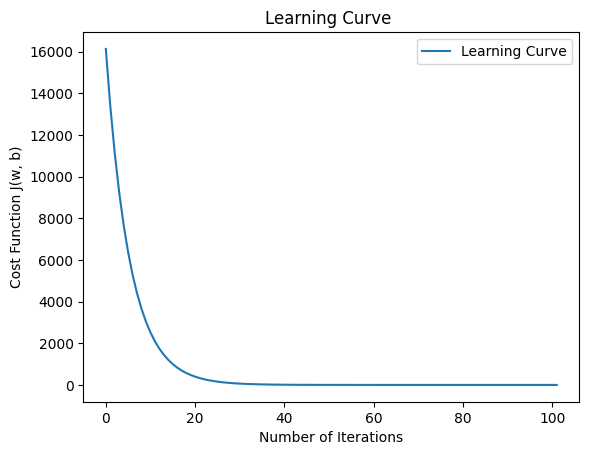

In [5]:
model.fit_data(np.array(X_train), np.array(y_train))

In [6]:
y_hat = model.predict(np.array(X_test))

In [7]:
error = y_hat - y_test
error

,Target
521,-0.516866
737,-0.180861
740,-0.809951
660,-0.919592
411,0.820452
...,...
408,0.991801
332,0.933991
208,-0.060006
613,0.139223


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Calculate metrics
mse = mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)

# Print metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 0.28
R^2 Score: 1.00


- Some visualizations for MLR

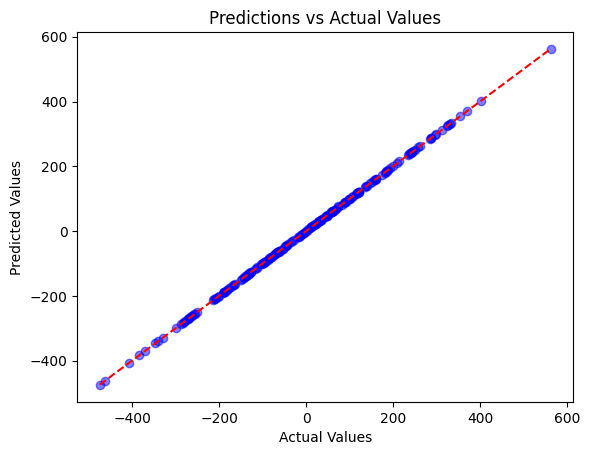

In [9]:
# scatter plot

import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your actual and predicted values respectively
plt.scatter(y_test, y_hat, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # y = x line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actual Values')
plt.show()

## 2. Multiple Linear Regression With Regularization (MLR_Reg)

In [10]:
import numpy as np
import matplotlib.pyplot as plt

class MLR_Regularized():
  def fit_data(self, x, y):
    '''
    x -> list of training examples (2d array)
    y -> list of actual outputs (1d array)
    m -> number of training examples (int)
    n -> number of features (int)
    w -> list of weights/coefficients of size n  (1d array)
    b -> bias/intercept (int)
    y_hat -> predicted output (1d array)
    cost -> dictionary :
            cost_w -> Contains lists of cost values for each weight w[i] across all iterations.
            cost_b -> Contains cost values for the bias term b across all iterations.
    cost_function -> list containing cost functions for each iteration
    number_of_iterations = min no of times we want our gradient descent to execute/run
    lmbd -> lambda, hyperparameter for regularization
    '''
    self.x = x
    self.y = y
    self.m = len(x)
    self.n = x.shape[1]
    self.w = np.zeros(self.n)
    self.b = 0
    self.y_hat = None
    self.cost = {
        'cost_w' : [],
        'cost_b' : []
    }
    self.cost_function = []
    self.number_of_iterations = 40
    # hyperparameter lambda
    self.lmbd = 0.007

    # calling recursive GD
    self.recursiveGD()

  def predict(self, x):
    '''
    x -> training/testing data (2d array)
    '''

    y_hat = []
    for i in range(len(x)):
      y_hat.append(np.dot(self.w, x[i]) + self.b)
    return y_hat

  def error_w(self, j):
    error = 0
    for i in range(len(self.y_hat)):
      error += (self.y_hat[i] - self.y[i])*self.x[i][j]
    return error

  def error_b(self):
    error = 0
    for i in range(len(self.y_hat)):
      error += (self.y_hat[i] - self.y[i])
    return error

  def cost_w(self):
    '''
    reg_term -> regularization term
    lmbd -> lambda
    '''
    cost_w = []
    for j in range(self.n):
      error = self.error_w(j)
      reg_term = (self.lmbd/self.m) * self.w[j]
      cost_w.append(((1/self.m) * error) + reg_term)
    return cost_w

  def cost_b(self):
    cost_b = (1/self.m) * self.error_b()
    return cost_b

  def cost_function_lc(self):
    """
    lc -> learning curve
    ss_weights -> sum of square of weights
    """
    result = 0
    ss_weights = 0
    error = 0

    # getting sum of square of all weights:
    for i in range(self.n):
      ss_weights += (self.w[i]**2)

    for i in range(len(self.y_hat)):
      error = error + ((self.y_hat[i] - self.y[i])**2)
    result = (1/(2*self.m)) * error
    reg_term = (self.lmbd/(2*self.m)) * ss_weights
    result += reg_term
    return result

  def plot_learningCurve(self):
    # printing the total number of iterations

    print("total number of iterations: ", len(self.cost_function))
    plt.plot(range(len(self.cost_function)), self.cost_function, label='Learning Curve')  # Plot cost_function vs # of iterations
    plt.xlabel('Number of Iterations')
    plt.ylabel('Cost Function J(w, b)')
    plt.title('Learning Curve ')
    plt.legend()
    plt.show()

  def abs_diff(self, a, b):

    # abs_diff stands for absolute difference
    result = abs(a-b)
    return result

  def stopping_criteria_check(self, threshold):
    '''
    Need to check that the cost function for the last 20 iterations has converged
    Also verifying that we have calculated the cost atleast 40 times, idk for what reason but yea (I do know, i mean that's the min number
    of iterations Im aiming for)
    '''
    cost = self.cost_function

    if len(cost) >= self.number_of_iterations :
      for i in range(-21, -1, 1):
        if self.abs_diff(cost[i], cost[i+1]) > threshold:
          return 1
        else:
          return 0

    else:
      return 1

  def recursiveGD(self):
    # call the predict function to make predictions on updated weights
    self.y_hat = self.predict(self.x)

    # call the cost function to calculate the cost for the weights and the bias
    self.cost['cost_w'].append(self.cost_w())
    self.cost['cost_b'].append(self.cost_b())

    # calculating cost function to plot our learning curve afterwards
    self.cost_function.append(self.cost_function_lc())

    # call the gradient descent to get the best parameters (weights + bias)
    self.gradient_descent()

  def gradient_descent(self):
    alpha = 0.06
    threshold = 1e-3 # 0.001

    # stopping criteria
    sc = self.stopping_criteria_check(threshold)
    if sc == 0:
      self.plot_learningCurve()
      return

    # updating w
    for i in range(self.n):
      self.w[i] = self.w[i] - alpha * self.cost['cost_w'][-1][i]

    # updating b
    self.b = self.b - alpha * self.cost['cost_b'][-1]

    # calling recursive GD
    self.recursiveGD()


### - Testing MLR_Regularized

In [11]:
model = MLR_Regularized()

total number of iterations:  141


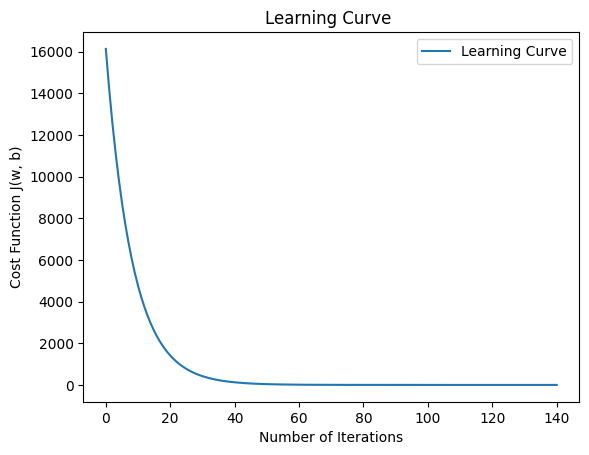

In [12]:
model.fit_data(np.array(X_train), np.array(y_train))

In [13]:
y_hat = model.predict(np.array(X_test))

In [14]:
error = y_hat - y_test
error

,Target
521,-0.481735
737,-0.180501
740,-0.798227
660,-0.914874
411,0.829927
...,...
408,0.948961
332,0.898919
208,-0.058137
613,0.098320


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Calculate metrics
mse = mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)

# Print metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 0.27
R^2 Score: 1.00


- Some visualizations for MLR_Regularized

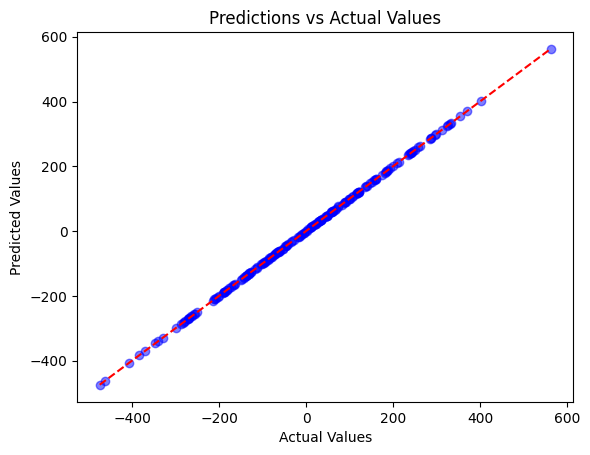

In [16]:
# scatter plot

import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your actual and predicted values respectively
plt.scatter(y_test, y_hat, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # y = x line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actual Values')
plt.show()

### Testing the Linear Regression model from sklearn

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 0.28
R^2 Score: 1.00


- some visualization for the predictions by the Linear Regression model by sklearn

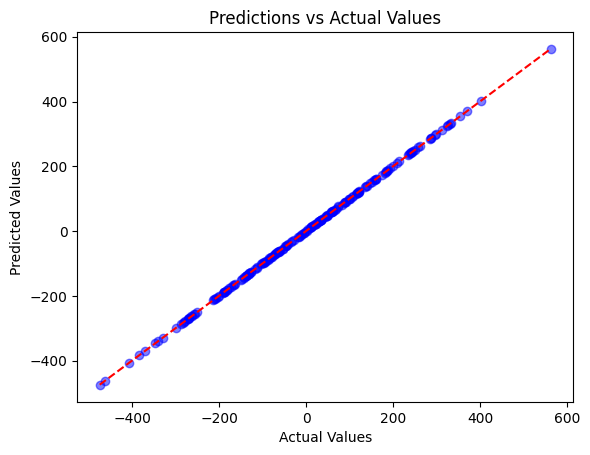

In [18]:
# scatter plot

import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your actual and predicted values respectively
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # y = x line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actual Values')
plt.show()